In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime

%matplotlib inline
pd.set_option('display.max_columns', None)

In [52]:
#load data
imdb_basic = pd.read_csv('data/title.basics.csv')
imdb_ratings = pd.read_csv('data/title.ratings.csv')
imdb_akas = pd.read_csv('data/title.akas.csv')
imdb_principals = pd.read_csv('data/title.principals.csv')
imdb_crew = pd.read_csv('data/title.crew.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
bom_gross = pd.read_csv('data/bom.movie_gross.csv')
tn_budget = pd.read_csv('data/tn.movie_budgets.csv')
tmdb_movie = pd.read_csv('data/tmdb.movies.csv')
rt_info = pd.read_csv('data/rt.movie_info.tsv', sep=None)
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep=None)

<ipython-input-52-af244a191d52>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  rt_info = pd.read_csv('data/rt.movie_info.tsv', sep=None)
<ipython-input-52-af244a191d52>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep=None)


In [63]:
#inspecting structure
imdb_basic.sort_values('start_year', ascending=False).head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,NaN,Action
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama"
2906,tt10298848,Untitled Disney Live-Action Project,Untitled Disney Live-Action Project,2023,NaN,NaN
106865,tt6258542,Wraith of the Umbra and Eidolon II,Wraith of the Umbra and Eidolon II,2023,NaN,"Adventure,Drama,Fantasy"


In [203]:
imdb_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [204]:
imdb_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [205]:
imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [206]:
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [207]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [208]:
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [59]:
tn_budget['release_date'].min()

'Apr 1, 1975'

In [210]:
tmdb_movie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [211]:
rt_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [212]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [213]:
#imdb_basic set has massive size, will need to drop most of it when combining since other sets are smaller
#imdb_akas doesn't seem very relevant
#tn_budget has more rows than bom_gross, could left join both of them then drop rows w/o data
#data from rt sets is mostly redundant, does have content rating data but not much of it
#    also the rt tables don't have movie name so joining them would not be so simple

In [214]:
#inspect 'genres'
imdb_basic['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Documentary,News,Reality-TV        1
Crime,Family,Thriller              1
History,Mystery                    1
Crime,Romance,Western              1
Comedy,Romance,Short               1
Name: genres, Length: 1085, dtype: int64

In [215]:
#get total distinct genres


distinct_genres_raw = imdb_basic['genres'].unique()
len(distinct_genres_raw)

distinct_genres_clean = set()

for elem in distinct_genres_raw:
    #print(type(elem))
    elem = str(elem)
    elem = elem.strip()
    elem = elem.lower()
    genres = elem.split(',')
    #print(type(genres))
    #print(genres)
    for category in genres:
        distinct_genres_clean.add(category)
        

In [216]:
print(len(distinct_genres_clean))
print(distinct_genres_clean)

28
{'documentary', 'talk-show', 'musical', 'game-show', 'sport', 'crime', 'music', 'reality-tv', 'sci-fi', 'adult', 'animation', 'drama', 'western', 'biography', 'comedy', 'war', 'short', 'thriller', 'romance', 'nan', 'action', 'adventure', 'fantasy', 'family', 'history', 'mystery', 'horror', 'news'}


In [217]:
#not too many categories. bool column for each?
#also has some missing values. how many?

In [218]:
imdb_basic['genres'].isna().sum()

5408

In [219]:
#hardly any rows compared to the size of the table. NaNs in other columns?

In [220]:
imdb_basic.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [221]:
#runtime is missing the most, but still only 25% of the set

In [222]:
bom_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [223]:
#too many missing in foreign_gross to drop.
#does NaN here imply foreign_gross was 0 or just isn't available?
#replace with 0? focus on domestic_gross only?

In [224]:
#dropping rows missing genre
imdb_basic.dropna(subset = ['genres'], inplace=True)
distinct_genres_clean.remove('nan')

In [225]:
imdb_basic.isna().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [226]:
#imdb_basic.reset_index(inplace=True)

In [227]:
#clean up imdb_basic 'genres' column
for category in distinct_genres_clean:
    print(category)
    imdb_basic.loc[(imdb_basic['genres'].str.strip().str.lower().str.contains(category)), category] = True

documentary
talk-show
musical
game-show
sport
crime
music
reality-tv
sci-fi
adult
animation
drama
western
biography
comedy
war
short
thriller
romance
action
adventure
fantasy
family
history
mystery
horror
news


In [228]:
#imdb_basic.loc[(imdb_basic['genres'].str.strip().str.lower().str.contains('drama'))]
imdb_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
#replace NaNs in new columns with false
for category in distinct_genres_clean:
    imdb_basic[category].fillna(False, inplace=True)

In [230]:
imdb_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [231]:
#nice

In [232]:
#setup to join tables
imdb_basic.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [233]:
imdb_ratings.isna().sum()

averagerating    0
numvotes         0
dtype: int64

In [234]:
#doing a left join since ratings is half the size of basic and i'd rather not dump all that out just yet
df = imdb_basic.join(imdb_ratings, how='left')
df

,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes
tconst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,6.5,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,NaN,NaN
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN


In [235]:
imdb_crew.set_index('tconst', inplace=True)
imdb_crew

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...
tt8999974,nm10122357,nm10122357
tt9001390,nm6711477,nm6711477
tt9001494,"nm10123242,nm10123248",NaN


In [236]:
#df2 = df.join(imdb_crew, how='left')
#df2
#don't join crew here, keep person data for separate table

In [237]:
#seems like imdb_principals will be harder to join, has multiple entries per title id
#should keep person data table separate from movie table, maybe multi-indexing?
#should export the data once the movie table joins are done, save all this setup

In [238]:
tn_budget['release_date'][50]

'Mar 5, 2010'

In [239]:
example_date = datetime.strptime(tn_budget['release_date'][50], '%b %d, %Y')

In [240]:
example_date.year

2010

In [241]:
#create a column to join financial data on

#start with a clean movie title
df.loc[:, 'title_clean'] = (df['primary_title'].str.strip().str.lower())
bom_gross.loc[:, 'title_clean'] = (bom_gross['title'].str.strip().str.lower())
tn_budget.loc[:, 'title_clean'] = (tn_budget['movie'].str.strip().str.lower())

#then add release year

#have to clean tn release date first

def cleanDate(dateStr):
    date = datetime.strptime(dateStr, '%b %d, %Y')
    return str(date.year)


tn_budget.loc[:, 'year_clean'] = tn_budget['release_date'].map(cleanDate)

df.loc[:, 'title_year'] = (df['title_clean'] + df['start_year'].astype(str))
bom_gross.loc[:, 'title_year'] = (bom_gross['title_clean'] + bom_gross['year'].astype(str))
tn_budget.loc[:, 'title_year'] = (tn_budget['title_clean'] + tn_budget['year_clean'].astype(str))


df.set_index('title_year', inplace=True)
bom_gross.set_index('title_year', inplace=True)
tn_budget.set_index('title_year', inplace=True)

In [242]:
#data still okay?
df

,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean
title_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sunghursh2013,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7.0,77.0,sunghursh
one day before the rainy season2019,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,43.0,one day before the rainy season
the other side of the wind2018,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,4517.0,the other side of the wind
sabse bada sukh2018,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,6.1,13.0,sabse bada sukh
the wandering soap opera2017,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,6.5,119.0,the wandering soap opera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the secret of china2019,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,NaN,NaN,the secret of china
kuambil lagi hatiku2019,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,kuambil lagi hatiku
rodolpho teóphilo - o legado de um pioneiro2015,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,rodolpho teóphilo - o legado de um pioneiro


In [243]:
bom_gross

,title,studio,domestic_gross,foreign_gross,year,title_clean
title_year,,,,,,
toy story 32010,Toy Story 3,BV,415000000.0,652000000,2010,toy story 3
alice in wonderland (2010)2010,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,alice in wonderland (2010)
harry potter and the deathly hallows part 12010,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,harry potter and the deathly hallows part 1
inception2010,Inception,WB,292600000.0,535700000,2010,inception
shrek forever after2010,Shrek Forever After,P/DW,238700000.0,513900000,2010,shrek forever after
...,...,...,...,...,...,...
the quake2018,The Quake,Magn.,6200.0,NaN,2018,the quake
edward ii (2018 re-release)2018,Edward II (2018 re-release),FM,4800.0,NaN,2018,edward ii (2018 re-release)
el pacto2018,El Pacto,Sony,2500.0,NaN,2018,el pacto


In [244]:
tn_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_clean,year_clean
title_year,,,,,,,,
avatar2009,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",avatar,2009
pirates of the caribbean: on stranger tides2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",pirates of the caribbean: on stranger tides,2011
dark phoenix2019,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",dark phoenix,2019
avengers: age of ultron2015,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",avengers: age of ultron,2015
star wars ep. viii: the last jedi2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",star wars ep. viii: the last jedi,2017
...,...,...,...,...,...,...,...,...
red 112018,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,red 11,2018
following1999,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",following,1999
return to the land of wonders2005,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",return to the land of wonders,2005


In [245]:
#joining bom_gross and tn_budget on title_year


df = df.join(bom_gross, how='left', rsuffix='_bom')
df = df.join(tn_budget, how='left', rsuffix='_tn')
df

,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean
title_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!women art revolution2010,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,196.0,!women art revolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1 serial killer2013,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,5.6,40.0,#1 serial killer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#50fathers2015,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,#50fathers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#52013,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,6.8,6.0,#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#52018,#5,#5,2018,NaN,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
üç harfliler: adak2019,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,7.2,212.0,üç harfliler: adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
üç harflilerin musallat oldugu büyülü konakta ruh çagiran gençlerin hazin hikayesi2018,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,4.8,51.0,üç harflilerin musallat oldugu büyülü konakta ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"üç, iki, bir... kestik!2014","Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.3,88.0,"üç, iki, bir... kestik!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
pd.set_option('display.max_columns', None)
df

,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean
title_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!women art revolution2010,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,196.0,!women art revolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1 serial killer2013,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,5.6,40.0,#1 serial killer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#50fathers2015,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,#50fathers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#52013,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,6.8,6.0,#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#52018,#5,#5,2018,NaN,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
üç harfliler: adak2019,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,7.2,212.0,üç harfliler: adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
üç harflilerin musallat oldugu büyülü konakta ruh çagiran gençlerin hazin hikayesi2018,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,4.8,51.0,üç harflilerin musallat oldugu büyülü konakta ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"üç, iki, bir... kestik!2014","Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.3,88.0,"üç, iki, bir... kestik!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
#just how much data on gross do we have?
df.isna().sum()

primary_title             0
original_title            2
start_year                0
runtime_minutes       28503
genres                    0
documentary               0
talk-show                 0
musical                   0
game-show                 0
sport                     0
crime                     0
music                     0
reality-tv                0
sci-fi                    0
adult                     0
animation                 0
drama                     0
western                   0
biography                 0
comedy                    0
war                       0
short                     0
thriller                  0
romance                   0
action                    0
adventure                 0
fantasy                   0
family                    0
history                   0
mystery                   0
horror                    0
news                      0
averagerating         67684
numvotes              67684
title_clean               0
title               

In [248]:
#as expected, the tn gross data had more matches than the smaller bom set, but only by a few hundred
#since gross is the metric of success, not much choice but to drop most of the data


In [250]:
#export dataframe to skip all the processing going forward
#df.to_csv('data/movie_table_master2.csv')

In [5]:
#check if data still good (seems fine)
df_import = pd.read_csv('data/movie_table_master2.csv')
df_import

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean
0,!women art revolution2010,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,196.0,!women art revolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#1 serial killer2013,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,5.6,40.0,#1 serial killer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#50fathers2015,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,#50fathers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#52013,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,6.8,6.0,#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#52018,#5,#5,2018,NaN,Documentary,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,üç harfliler: adak2019,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,7.2,212.0,üç harfliler: adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140732,üç harflilerin musallat oldugu büyülü konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,4.8,51.0,üç harflilerin musallat oldugu büyülü konakta ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140733,"üç, iki, bir... kestik!2014","Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.3,88.0,"üç, iki, bir... kestik!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140734,üçüncü bölgeden hücum varyasyonlari2017,Üçüncü bölgeden hücum varyasyonlari,Üçüncü bölgeden hücum varyasyonlari,2017,78.0,"Documentary,Sport",True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,üçüncü bölgeden hücum varyasyonlari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_import.isna().sum()

title_year                0
primary_title             0
original_title            2
start_year                0
runtime_minutes       28503
genres                    0
documentary               0
talk-show                 0
musical                   0
game-show                 0
sport                     0
crime                     0
music                     0
reality-tv                0
sci-fi                    0
adult                     0
animation                 0
drama                     0
western                   0
biography                 0
comedy                    0
war                       0
short                     0
thriller                  0
romance                   0
action                    0
adventure                 0
fantasy                   0
family                    0
history                   0
mystery                   0
horror                    0
news                      0
averagerating         67684
numvotes              67684
title_clean         

In [7]:
df = df_import.dropna(subset=['domestic_gross_tn'])
df

,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean
41,#horror2015,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3.0,3092.0,#horror,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,#horror,2015.0
322,10 cloverfield lane2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,7.2,260383.0,10 cloverfield lane,10 Cloverfield Lane,Par.,72100000.0,38100000,2016.0,10 cloverfield lane,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",10 cloverfield lane,2016.0
325,10 days in a madhouse2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,10 days in a madhouse,NaN,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",10 days in a madhouse,2015.0
570,12 strong2018,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,6.6,50155.0,12 strong,12 Strong,WB,45800000.0,21600000,2018.0,12 strong,64.0,"Jan 19, 2018",12 Strong,"$35,000,000","$45,819,713","$71,118,378",12 strong,2018.0
573,12 years a slave2013,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,8.1,577301.0,12 years a slave,12 Years a Slave,FoxS,56700000.0,131100000,2013.0,12 years a slave,18.0,"Oct 18, 2013",12 Years a Slave,"$20,000,000","$56,671,993","$181,025,343",12 years a slave,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140211,zombie hunter2013,Zombie Hunter,Zombie Hunter,2013,93.0,"Action,Comedy,Horror",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,3.5,2372.0,zombie hunter,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Oct 8, 2013",Zombie Hunter,"$1,000,000",$0,$0,zombie hunter,2013.0
140314,zookeeper2011,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5.2,52396.0,zookeeper,Zookeeper,Sony,80400000.0,8.95e+07,2011.0,zookeeper,71.0,"Jul 8, 2011",Zookeeper,"$80,000,000","$80,360,866","$170,805,525",zookeeper,2011.0
140317,zoolander 22016,Zoolander 2,Zoolander 2,2016,101.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.7,59914.0,zoolander 2,Zoolander 2,Par.,28800000.0,2.79e+07,2016.0,zoolander 2,64.0,"Feb 12, 2016",Zoolander 2,"$50,000,000","$28,848,693","$55,348,693",zoolander 2,2016.0
140334,zootopia2016,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,F

In [8]:
#looks like the bom domestic and foreign_gross columns aren't as accurate as the tn gross columns
#how much data do we have for other columns?
df.isna().sum()

title_year             0
primary_title          0
original_title         0
start_year             0
runtime_minutes       22
genres                 0
documentary            0
talk-show              0
musical                0
game-show              0
sport                  0
crime                  0
music                  0
reality-tv             0
sci-fi                 0
adult                  0
animation              0
drama                  0
western                0
biography              0
comedy                 0
war                    0
short                  0
thriller               0
romance                0
action                 0
adventure              0
fantasy                0
family                 0
history                0
mystery                0
horror                 0
news                   0
averagerating         45
numvotes              45
title_clean            0
title                481
studio               481
domestic_gross       482
foreign_gross        590


In [9]:
#looks like most of the matches to the bom table didn't overlap with the matches to tn
#need to only drop rows missing data for both columns
#then, combine both columns into a single total_gross column. will use tn data where available over bom for detail

In [10]:
df = df_import.dropna(subset=['domestic_gross_tn', 'domestic_gross'], how='all')
df

,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean
41,#horror2015,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3.0,3092.0,#horror,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,#horror,2015.0
322,10 cloverfield lane2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,7.2,260383.0,10 cloverfield lane,10 Cloverfield Lane,Par.,72100000.0,38100000,2016.0,10 cloverfield lane,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",10 cloverfield lane,2016.0
325,10 days in a madhouse2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,10 days in a madhouse,NaN,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",10 days in a madhouse,2015.0
465,102 not out2018,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 not out,102 Not Out,Sony,1300000.0,10900000,2018.0,102 not out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,11-11-112011,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,4.0,11712.0,11-11-11,11-11-11,Rocket,32800.0,5700000,2011.0,11-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140211,zombie hunter2013,Zombie Hunter,Zombie Hunter,2013,93.0,"Action,Comedy,Horror",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,3.5,2372.0,zombie hunter,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Oct 8, 2013",Zombie Hunter,"$1,000,000",$0,$0,zombie hunter,2013.0
140314,zookeeper2011,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5.2,52396.0,zookeeper,Zookeeper,Sony,80400000.0,8.95e+07,2011.0,zookeeper,71.0,"Jul 8, 2011",Zookeeper,"$80,000,000","$80,360,866","$170,805,525",zookeeper,2011.0
140317,zoolander 22016,Zoolander 2,Zoolander 2,2016,101.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.7,59914.0,zoolander 2,Zoolander 2,Par.,28800000.0,2.79e+07,2016.0,zoolander 2,64.0,"Feb 12, 2016",Zoolander 2,"$50,000,000","$28,848,693","$55,348,693",zoolander 2,2016.0
140334,zootopia2016,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,8.0,383446.0,zootopia,Zoo

In [11]:
df.isna().sum()

title_year              0
primary_title           0
original_title          0
start_year              0
runtime_minutes        27
genres                  0
documentary             0
talk-show               0
musical                 0
game-show               0
sport                   0
crime                   0
music                   0
reality-tv              0
sci-fi                  0
adult                   0
animation               0
drama                   0
western                 0
biography               0
comedy                  0
war                     0
short                   0
thriller                0
romance                 0
action                  0
adventure               0
fantasy                 0
family                  0
history                 0
mystery                 0
horror                  0
news                    0
averagerating          62
numvotes               62
title_clean             0
title                 481
studio                481
domestic_gro

In [12]:
strt = '$100,000'
float(strt.replace('$', '').replace(',', ''))

100000.0

In [13]:
#gotta clean this cell up, .apply or .map maybe?
#wherever tn data is available, clean and set as total_gross

def cleanGross(gross):
    gross = str(gross)
    gross = gross.replace('$', '').replace(',', '')
    return float(gross)

df.loc[~df['worldwide_gross'].isnull(), 'total_gross'] = df['worldwide_gross'].map(cleanGross)



C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [14]:
#where tn data is missing, use bom data

#gotta deal with missing values in foreign gross
#df.loc[~df['domestic_gross'].isnull() & df['foreign_gross'].isnull(), 'foreign_gross'] = 0.0
#actually, should those values be dropped, instead? nan doesn't seem to mean 0 in this case

df.loc[~df['domestic_gross'].isnull() & df['foreign_gross'].isnull()]

,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross
626,13 sins2014,13 Sins,13 Sins,2014,93.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,6.3,29550.0,13 sins,13 Sins,RTWC,13800.0,NaN,2014.0,13 sins,51.0,"Apr 18, 2014",13 Sins,"$4,000,000","$9,134","$47,552",13 sins,2014.0,47552.0
802,19112011,1911,Xin hai ge ming,2011,121.0,"Action,Adventure,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,5.9,5534.0,1911,1911,Vari.,136000.0,NaN,2011.0,1911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
944,2 states2014,2 States,2 States,2014,149.0,"Comedy,Drama,Romance",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,6.9,21715.0,2 states,2 States,UTV,2200000.0,NaN,2014.0,2 states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,20 feet from stardom2013,20 Feet from Stardom,Twenty Feet from Stardom,2013,91.0,"Documentary,Music",True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.4,11312.0,20 feet from stardom,20 Feet from Stardom,RTWC,4900000.0,NaN,2013.0,20 feet from stardom,37.0,"Jun 14, 2013",20 Feet From Stardom,"$1,000,000","$4,946,250","$5,892,466",20 feet from stardom,2013.0,5892466.0
1065,20th century women2016,20th Century Women,20th Century Women,2016,119.0,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.3,32057.0,20th century women,20th Century Women,A24,5700000.0,NaN,2016.0,20th century women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139440,you're not you2014,You're Not You,You're Not You,2014,102.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.4,22156.0,you're not you,You're Not You,EOne,11500.0,NaN,2014.0,you're not you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139616,youth2015,Youth,Youth,2015,124.0,"Comedy,Drama,Music",False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.3,64418.0,youth,Youth,FoxS,2700000.0,NaN,2015.0,youth,99.0,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573",youth,2015.0,24001573.0
139739,z for zachariah2015,Z for Zachariah,Z for Zachariah,2015,98.0,"Drama,Sci-Fi,Thriller",False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,6.0,25429.0,z for zachariah,Z for Zachariah,RAtt.,121000.0,NaN,2015.0,z for zachariah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139987,zero motivation2014,Zero Motivation,Efes beyahasei enosh,2014,97.0,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.3,3645.0,zero motivation,Zero Motivation,Zeit.,116000.0,NaN,2014.0,zero motivatio

In [15]:
df.loc[df['foreign_gross'] == 0]


,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross


In [16]:
#not super clear, gonna drop em
df.drop(df.loc[df['worldwide_gross'].isna() & (~df['domestic_gross'].isnull() & df['foreign_gross'].isnull())].index, inplace=True)
#stack says this is how to do this, should check if there is a cleaner way
df

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross
41,#horror2015,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3.0,3092.0,#horror,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,#horror,2015.0,0.000000e+00
322,10 cloverfield lane2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,7.2,260383.0,10 cloverfield lane,10 Cloverfield Lane,Par.,72100000.0,38100000,2016.0,10 cloverfield lane,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",10 cloverfield lane,2016.0,1.082864e+08
325,10 days in a madhouse2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,10 days in a madhouse,NaN,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",10 days in a madhouse,2015.0,1.461600e+04
465,102 not out2018,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 not out,102 Not Out,Sony,1300000.0,10900000,2018.0,102 not out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,11-11-112011,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,4.0,11712.0,11-11-11,11-11-11,Rocket,32800.0,5700000,2011.0,11-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140211,zombie hunter2013,Zombie Hunter,Zombie Hunter,2013,93.0,"Action,Comedy,Horror",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,3.5,2372.0,zombie hunter,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Oct 8, 2013",Zombie Hunter,"$1,000,000",$0,$0,zombie hunter,2013.0,0.000000e+00
140314,zookeeper2011,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5.2,52396.0,zookeeper,Zookeeper,Sony,80400000.0,8.95e+07,2011.0,zookeeper,71.0,"Jul 8, 2011",Zookeeper,"$80,000,000","$80,360,866","$170,805,525",zookeeper,2011.0,1.708055e+08
140317,zoolander 22016,Zoolander 2,Zoolander 2,2016,101.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.7,59914.0,zoolander 2,Zoolander 2,Par.,28800000.0,2.79e+07,2016.0,zoolander 2,64.0,"Feb 12, 2016",Zoolander 2,"$50,000,000","$28,848,693","$55,348,693",zoolander 2,2016.0,5.534869e+07
140334,zootopia2016,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,False,False,False,False,False,False,True,False,False,False

In [17]:
#convert domestic and foreign gross to all floats (cleanGross should work here)
df['domestic_gross'] = df['domestic_gross'].map(cleanGross)
df['foreign_gross'] = df['foreign_gross'].map(cleanGross)

<ipython-input-17-e3a1755fd44d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domestic_gross'] = df['domestic_gross'].map(cleanGross)
<ipython-input-17-e3a1755fd44d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].map(cleanGross)


In [18]:
#use bom data where tn data is unavailable
df.loc[df['total_gross'].isnull(), 'total_gross'] = df['domestic_gross'] + df['foreign_gross']
df

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross
41,#horror2015,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3.0,3092.0,#horror,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,#horror,2015.0,0.000000e+00
322,10 cloverfield lane2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,7.2,260383.0,10 cloverfield lane,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,10 cloverfield lane,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",10 cloverfield lane,2016.0,1.082864e+08
325,10 days in a madhouse2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,10 days in a madhouse,NaN,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",10 days in a madhouse,2015.0,1.461600e+04
465,102 not out2018,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 not out,102 Not Out,Sony,1300000.0,10900000.0,2018.0,102 not out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.220000e+07
506,11-11-112011,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,4.0,11712.0,11-11-11,11-11-11,Rocket,32800.0,5700000.0,2011.0,11-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140211,zombie hunter2013,Zombie Hunter,Zombie Hunter,2013,93.0,"Action,Comedy,Horror",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,3.5,2372.0,zombie hunter,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Oct 8, 2013",Zombie Hunter,"$1,000,000",$0,$0,zombie hunter,2013.0,0.000000e+00
140314,zookeeper2011,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5.2,52396.0,zookeeper,Zookeeper,Sony,80400000.0,89500000.0,2011.0,zookeeper,71.0,"Jul 8, 2011",Zookeeper,"$80,000,000","$80,360,866","$170,805,525",zookeeper,2011.0,1.708055e+08
140317,zoolander 22016,Zoolander 2,Zoolander 2,2016,101.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.7,59914.0,zoolander 2,Zoolander 2,Par.,28800000.0,27900000.0,2016.0,zoolander 2,64.0,"Feb 12, 2016",Zoolander 2,"$50,000,000","$28,848,693","$55,348,693",zoolander 2,2016.0,5.534869e+07
140334,zootopia2016,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,False,False,False,False,False,

In [19]:
#still missing any values?
df.isna().sum()

title_year             0
primary_title          0
original_title         0
start_year             0
runtime_minutes       23
genres                 0
documentary            0
talk-show              0
musical                0
game-show              0
sport                  0
crime                  0
music                  0
reality-tv             0
sci-fi                 0
adult                  0
animation              0
drama                  0
western                0
biography              0
comedy                 0
war                    0
short                  0
thriller               0
romance                0
action                 0
adventure              0
fantasy                0
family                 0
history                0
mystery                0
horror                 0
news                   0
averagerating         45
numvotes              45
title_clean            0
title                481
studio               481
domestic_gross       482
foreign_gross        481


In [20]:
#any duplicates?
df['title_year'].duplicated().sum()

55

In [21]:
#lets see it
df[df[['title_year']].duplicated(keep=False)]

,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross
5385,abduction2011,Abduction,Abduction,2011,106.0,"Action,Mystery,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,5.1,72552.0,abduction,Abduction,LGF,28100000.0,54000000.0,2011.0,abduction,96.0,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359",abduction,2011.0,86648359.0
5386,abduction2011,Abduction,Abduction,2011,84.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,5.2,10.0,abduction,Abduction,LGF,28100000.0,54000000.0,2011.0,abduction,96.0,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359",abduction,2011.0,86648359.0
5585,absentia2011,Absentia,Absentia,2011,87.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,5.8,15507.0,absentia,NaN,NaN,NaN,NaN,NaN,NaN,6.0,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555",absentia,2011.0,8555.0
5586,absentia2011,Absentia,Absentia,2011,60.0,Sci-Fi,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,absentia,NaN,NaN,NaN,NaN,NaN,NaN,6.0,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555",absentia,2011.0,8555.0
6484,after2012,After,After,2012,90.0,"Drama,Fantasy,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,5.5,4881.0,after,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"Dec 31, 2012",After,"$650,000",$0,$0,after,2012.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131009,underdogs2013,Underdogs,Metegol,2013,106.0,"Adventure,Animation,Family",False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,6.5,8197.0,underdogs,NaN,NaN,NaN,NaN,NaN,NaN,41.0,"Aug 16, 2013",Underdogs,"$2,500,000","$35,017","$1,392,649",underdogs,2013.0,1392649.0
131010,underdogs2013,Underdogs,Underdogs,2013,102.0,"Drama,Family,Sport",False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5.8,882.0,underdogs,NaN,NaN,NaN,NaN,NaN,NaN,41.0,"Aug 16, 2013",Underdogs,"$2,500,000","$35,017","$1,392,649",underdogs,2013.0,1392649.0
135588,weekend2011,Weekend,Weekend,2011,97.0,"Drama,Romance",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,7.6,25424.0,weekend,NaN,NaN,NaN,NaN,NaN,NaN,43.0,"Sep 23, 2011",Weekend,"$190,000","$484,592","$1,577,585",weekend,2011.0,1577585.0
135589,weekend2011,Weekend,Weekend,2011,121.0,"Action,Comedy,Crime",False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,4.0,583.0,weekend,NaN,NaN,NaN,NaN,NaN,NaN,43.0,"Sep 23, 2011",Weekend,"$190,000","$484,592","$1,577,585",weekend,2011.0,1577585.0


In [22]:
#just a handful of records, so i'm going to drop them
df = df[~df[['title_year']].duplicated(keep=False)]
df['title_year'].duplicated().sum()

0

In [23]:
df

,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross
41,#horror2015,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3.0,3092.0,#horror,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,#horror,2015.0,0.000000e+00
322,10 cloverfield lane2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,7.2,260383.0,10 cloverfield lane,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,10 cloverfield lane,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",10 cloverfield lane,2016.0,1.082864e+08
325,10 days in a madhouse2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,10 days in a madhouse,NaN,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",10 days in a madhouse,2015.0,1.461600e+04
465,102 not out2018,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 not out,102 Not Out,Sony,1300000.0,10900000.0,2018.0,102 not out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.220000e+07
506,11-11-112011,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,4.0,11712.0,11-11-11,11-11-11,Rocket,32800.0,5700000.0,2011.0,11-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140211,zombie hunter2013,Zombie Hunter,Zombie Hunter,2013,93.0,"Action,Comedy,Horror",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,3.5,2372.0,zombie hunter,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Oct 8, 2013",Zombie Hunter,"$1,000,000",$0,$0,zombie hunter,2013.0,0.000000e+00
140314,zookeeper2011,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5.2,52396.0,zookeeper,Zookeeper,Sony,80400000.0,89500000.0,2011.0,zookeeper,71.0,"Jul 8, 2011",Zookeeper,"$80,000,000","$80,360,866","$170,805,525",zookeeper,2011.0,1.708055e+08
140317,zoolander 22016,Zoolander 2,Zoolander 2,2016,101.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.7,59914.0,zoolander 2,Zoolander 2,Par.,28800000.0,27900000.0,2016.0,zoolander 2,64.0,"Feb 12, 2016",Zoolander 2,"$50,000,000","$28,848,693","$55,348,693",zoolander 2,2016.0,5.534869e+07
140334,zootopia2016,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,False,False,False,False,False,

<AxesSubplot:>

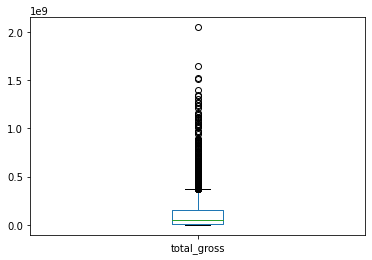

In [24]:
#inspect distribution
df['total_gross'].plot.box()

<AxesSubplot:>

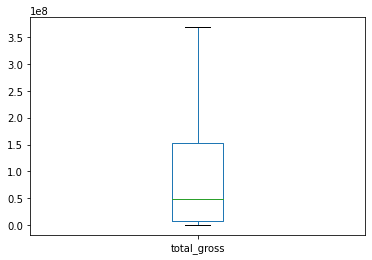

In [25]:
df['total_gross'].plot.box(showfliers=False)

In [26]:
df['total_gross'].describe()

count    1.694000e+03
mean     1.352537e+08
std      2.266434e+08
min      0.000000e+00
25%      7.821262e+06
50%      4.845203e+07
75%      1.521310e+08
max      2.048134e+09
Name: total_gross, dtype: float64

In [27]:
#seems like most values are on the low end, but there are quite a few outliers
#how many out of the set are outliers?

#lets see if this works
from matplotlib.cbook import boxplot_stats
gross_stats = boxplot_stats(df['total_gross'])
len(gross_stats[0]['fliers'])


169

In [28]:
#create new column, return on investment (roi)

#need to clean this one, too
df['production_budget'] = df['production_budget'].map(cleanGross)

df.loc[~df['production_budget'].isnull(), 'roi'] = df['total_gross'] - df['production_budget']
df[~df['roi'].isna()]

<ipython-input-28-5f490f41f7fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_budget'] = df['production_budget'].map(cleanGross)
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross,roi
41,#horror2015,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3.0,3092.0,#horror,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,1500000.0,$0,$0,#horror,2015.0,0.000000e+00,-1500000.0
322,10 cloverfield lane2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,7.2,260383.0,10 cloverfield lane,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,10 cloverfield lane,54.0,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,"$72,082,999","$108,286,422",10 cloverfield lane,2016.0,1.082864e+08,103286422.0
325,10 days in a madhouse2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,10 days in a madhouse,NaN,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,"$14,616","$14,616",10 days in a madhouse,2015.0,1.461600e+04,-11985384.0
570,12 strong2018,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,6.6,50155.0,12 strong,12 Strong,WB,45800000.0,21600000.0,2018.0,12 strong,64.0,"Jan 19, 2018",12 Strong,35000000.0,"$45,819,713","$71,118,378",12 strong,2018.0,7.111838e+07,36118378.0
573,12 years a slave2013,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,8.1,577301.0,12 years a slave,12 Years a Slave,FoxS,56700000.0,131100000.0,2013.0,12 years a slave,18.0,"Oct 18, 2013",12 Years a Slave,20000000.0,"$56,671,993","$181,025,343",12 years a slave,2013.0,1.810253e+08,161025343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140211,zombie hunter2013,Zombie Hunter,Zombie Hunter,2013,93.0,"Action,Comedy,Horror",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,3.5,2372.0,zombie hunter,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Oct 8, 2013",Zombie Hunter,1000000.0,$0,$0,zombie hunter,2013.0,0.000000e+00,-1000000.0
140314,zookeeper2011,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5.2,52396.0,zookeeper,Zookeeper,Sony,80400000.0,89500000.0,2011.0,zookeeper,71.0,"Jul 8, 2011",Zookeeper,80000000.0,"$80,360,866","$170,805,525",zookeeper,2011.0,1.708055e+08,90805525.0
140317,zoolander 22016,Zoolander 2,Zoolander 2,2016,101.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,4.7,59914.0,zoolander 2,Zoolander 2,Par.,28800000.0,27900000.0,2016.0,zoolan

<AxesSubplot:>

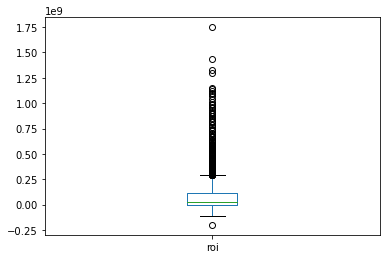

In [29]:

df['roi'].plot.box()

<AxesSubplot:>

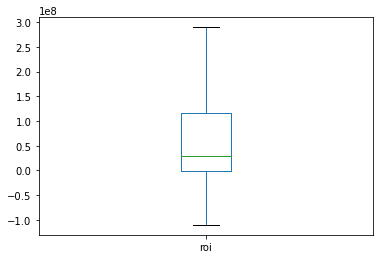

In [30]:
df['roi'].plot.box(showfliers=False)

In [31]:
df['roi'].describe()

count    1.379000e+03
mean     1.026891e+08
std      1.970464e+08
min     -2.002376e+08
25%     -4.881080e+05
50%      2.868098e+07
75%      1.157153e+08
max      1.748134e+09
Name: roi, dtype: float64

In [32]:
#looks like a good chunk of movies lost money overall
#this might be a more valuable feature than I expected

#how many fliers?
roi_stats = boxplot_stats(df['roi'])
roi_stats


C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


[{'mean': nan,
  'iqr': nan,
  'cilo': nan,
  'cihi': nan,
  'whishi': nan,
  'whislo': nan,
  'fliers': array([], dtype=float64),
  'q1': nan,
  'med': nan,
  'q3': nan}]

In [33]:
#thats definitely not right, maybe it doesn't work with null values?
roi_stats = boxplot_stats(df.dropna(subset=['roi'], inplace=False)['roi'])
len(roi_stats[0]['fliers'])


151

In [34]:
#begin looking at correlation
df.corr()

,start_year,runtime_minutes,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,domestic_gross,foreign_gross,year,id,production_budget,year_clean,total_gross,roi
start_year,1.000000,0.117414,-0.062876,NaN,-0.017670,NaN,-0.005119,-0.006205,-0.013367,NaN,0.049020,NaN,0.043006,0.005370,-0.049039,0.096299,-0.068177,0.010626,NaN,-0.009933,-0.096756,0.072958,0.089842,-0.012125,-0.047724,0.078280,0.036011,0.032356,NaN,0.046711,-0.110165,0.076764,0.106795,1.000000,0.014046,0.061074,1.000000,0.089938,0.087157
runtime_minutes,0.117414,1.000000,-0.205695,NaN,0.045405,NaN,0.090892,0.040388,0.000106,NaN,0.098560,NaN,-0.202246,0.227339,0.019964,0.162276,-0.181118,0.046459,NaN,-0.024544,0.016232,0.185827,0.090957,0.055880,-0.041724,0.144129,-0.021201,-0.187570,NaN,0.343037,0.371663,0.226220,0.248527,0.115787,-0.021605,0.392151,0.125151,0.298787,0.306532
documentary,-0.062876,-0.205695,1.000000,NaN,-0.016149,NaN,-0.005920,-0.058306,0.121599,NaN,-0.059723,NaN,-0.054907,-0.171170,-0.017566,0.001386,-0.116007,0.037089,NaN,-0.080616,-0.077373,-0.118851,-0.103824,-0.058307,-0.035669,-0.019746,-0.048795,-0.068662,NaN,0.127118,-0.119651,-0.107007,-0.097657,-0.045216,-0.012347,-0.105021,-0.063286,-0.103868,-0.072009
talk-show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
musical,-0.017670,0.045405,-0.016149,NaN,1.000000,NaN,-0.011395,-0.034033,0.407998,NaN,-0.024171,NaN,-0.022222,0.026284,-0.007110,0.000166,0.016858,-0.008610,NaN,-0.035976,-0.009494,-0.053506,-0.044949,0.058374,0.011972,-0.014948,-0.024266,-0.027789,NaN,-0.052960,-0.027719,-0.004201,0.000433,0.001659,-0.039787,-0.001451,-0.016395,0.020923,0.034384
game-show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sport,-0.005119,0.090892,-0.005920,NaN,-0.011395,NaN,1.000000,-0.047391,-0.027930,NaN,-0.042142,NaN,-0.038744,0.080042,-0.012395,0.164205,-0.050956,-0.015012,NaN,-0.062723,-0.029234,-0.046885,-0.078367,-0.041143,0.002399,-0.026062,-0.042307,-0.048450,NaN,0.090507,-0.030684,-0.032133,-0.063490,-0.002163,0.052079,-0.054846,-0.003499,-0.051561,-0.052754
crime,-0.006205,0.040388,-0.058306,NaN,-0.034033,NaN,-0.047391,1.000000,-0.083413,NaN,-0.095783,NaN,-0.102792,0.010326,-0.037019,-0.028976,-0.056825,-0.044834,NaN,0.083782,-0.148351,0.180512,-0.167968,-0.116738,-0.103178,-0.059369,0.023536,-0.085626,NaN,0.003802,-0.000316,-0.093189,-0.140659,-0.009506,-0.006546,-0.102442,0.011852,-0.098071,-0.110770
music,-0.013367,0.000106,0.121599,NaN,0.407998,NaN,-0.027930,-0.083413,1.000000,NaN,-0.059243,NaN,-0.054466,0.078514,-0.017425,0.023975,-0.004569,-0.021104,NaN,-0.079841,0.033557,-0.131144,-0.102879,-0.011796,-0.021786,-0.036638,-0.059475,-0.068111,NaN,0.000110,-0.054830,-0.045156,-0.048050,-0.003501,0.014502,-0.089154,-0.018105,-0.032711,-0.012775
reality-tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.corr().unstack().sort_values(ascending=False)

roi         roi           1.0
year_clean  year_clean    1.0
fantasy     fantasy       1.0
family      family        1.0
history     history       1.0
                         ... 
roi         game-show     NaN
            reality-tv    NaN
            adult         NaN
            short         NaN
            news          NaN
Length: 1521, dtype: float64

In [36]:
#gotta be able to see more rows
with pd.option_context('display.max_rows', None):
    print(df.corr().unstack().sort_values(ascending=False))

roi                roi                  1.000000
year_clean         year_clean           1.000000
fantasy            fantasy              1.000000
family             family               1.000000
history            history              1.000000
mystery            mystery              1.000000
horror             horror               1.000000
averagerating      averagerating        1.000000
numvotes           numvotes             1.000000
domestic_gross     domestic_gross       1.000000
foreign_gross      foreign_gross        1.000000
year               start_year           1.000000
                   year                 1.000000
                   year_clean           1.000000
id                 id                   1.000000
production_budget  production_budget    1.000000
year_clean         start_year           1.000000
adventure          adventure            1.000000
romance            romance              1.000000
thriller           thriller             1.000000
crime              c

In [37]:
#action and animation genres both have high correlation to total_gross
#but adventure is highest with a .47! there must be some outliers at play for a number like that.

#the correlation between rating and gross is good, but num_ratings and gross is crazy high.
#makes sense, since popular, successful movies will attract lots of ratings

#unsurprisingly, production_budget is highly correlated with total gross


#some of the genre-to-gross values seem extreme, should try filtering outliers from gross/roi

In [38]:
#looks like the genre columns showing up as NaN are all false
df['game-show'].value_counts()

False    1694
Name: game-show, dtype: int64

In [39]:
def getOutlierRange(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    
    return (lower_bound, upper_bound)

gross_out = getOutlierRange(df['total_gross'])
df_dropOutliers = df[~( (df['total_gross'] < gross_out[0]) | (df['total_gross'] > gross_out[1]) )]

roi_out = getOutlierRange(df_dropOutliers['roi'])
df_dropOutliers = df_dropOutliers[~( (df_dropOutliers['roi'] < roi_out[0]) | (df_dropOutliers['roi'] > roi_out[1]) )]

df_dropOutliers

,title_year,primary_title,original_title,start_year,runtime_minutes,genres,documentary,talk-show,musical,game-show,sport,crime,music,reality-tv,sci-fi,adult,animation,drama,western,biography,comedy,war,short,thriller,romance,action,adventure,fantasy,family,history,mystery,horror,news,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year,title_clean_bom,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,title_clean_tn,year_clean,total_gross,roi
41,#horror2015,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3.0,3092.0,#horror,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,1500000.0,$0,$0,#horror,2015.0,0.0,-1500000.0
322,10 cloverfield lane2016,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,7.2,260383.0,10 cloverfield lane,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,10 cloverfield lane,54.0,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,"$72,082,999","$108,286,422",10 cloverfield lane,2016.0,108286422.0,103286422.0
325,10 days in a madhouse2015,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,10 days in a madhouse,NaN,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,"$14,616","$14,616",10 days in a madhouse,2015.0,14616.0,-11985384.0
465,102 not out2018,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 not out,102 Not Out,Sony,1300000.0,10900000.0,2018.0,102 not out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200000.0,NaN
506,11-11-112011,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,4.0,11712.0,11-11-11,11-11-11,Rocket,32800.0,5700000.0,2011.0,11-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5732800.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140119,zipper2015,Zipper,Zipper,2015,112.0,"Drama,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,5.8,6120.0,zipper,NaN,NaN,NaN,NaN,NaN,NaN,57.0,"Aug 28, 2015",Zipper,4500000.0,$0,$0,zipper,2015.0,0.0,-4500000.0
140211,zombie hunter2013,Zombie Hunter,Zombie Hunter,2013,93.0,"Action,Comedy,Horror",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,3.5,2372.0,zombie hunter,NaN,NaN,NaN,NaN,NaN,NaN,16.0,"Oct 8, 2013",Zombie Hunter,1000000.0,$0,$0,zombie hunter,2013.0,0.0,-1000000.0
140314,zookeeper2011,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5.2,52396.0,zookeeper,Zookeeper,Sony,80400000.0,89500000.0,2011.0,zookeeper,71.0,"Jul 8, 2011",Zookeeper,80000000.0,"$80,360,866","$170,805,525",zookeeper,2011.0,170805525.0,90805525.0
140317,zoolander 22016,Zoolander 2,Zoolander 2,2016,101.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,

In [40]:
#are the results from our correlation different now?
with pd.option_context('display.max_rows', None):
    print(df_dropOutliers.corr().unstack().sort_values(ascending=False))

roi                roi                  1.000000
year_clean         year_clean           1.000000
fantasy            fantasy              1.000000
family             family               1.000000
history            history              1.000000
mystery            mystery              1.000000
horror             horror               1.000000
averagerating      averagerating        1.000000
numvotes           numvotes             1.000000
domestic_gross     domestic_gross       1.000000
foreign_gross      foreign_gross        1.000000
year               start_year           1.000000
                   year                 1.000000
                   year_clean           1.000000
id                 id                   1.000000
production_budget  production_budget    1.000000
year_clean         start_year           1.000000
adventure          adventure            1.000000
romance            romance              1.000000
thriller           thriller             1.000000
crime              c

<AxesSubplot:>

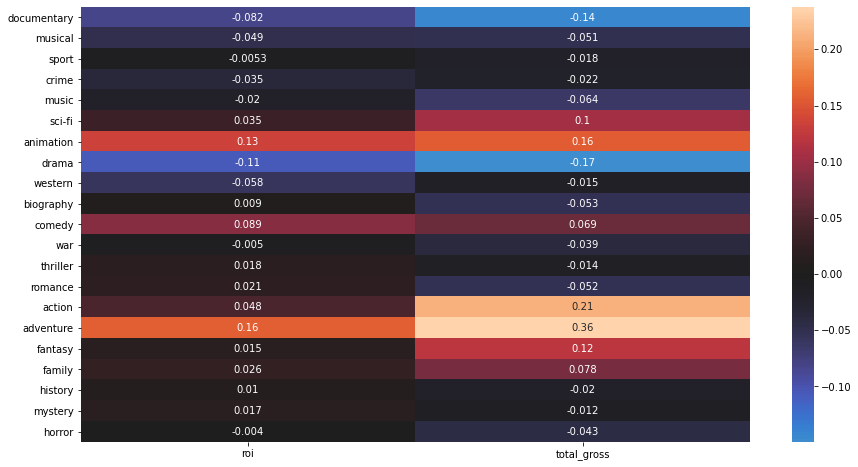

In [41]:
corr_col = ['documentary', 'talk-show', 'musical', 'game-show', 'sport', 'crime', 'music', 'reality-tv',
            'sci-fi', 'adult', 'animation', 'drama', 'western', 'biography', 'comedy', 'war', 'short',
            'thriller', 'romance', 'action', 'adventure', 'fantasy', 'family', 'history', 'mystery', 'horror', 'news', 
            'roi', 'total_gross']



plt.figure(figsize = (15,8))
df_corr = df_dropOutliers[corr_col].corr()[['roi', 'total_gross']]
df_corr.dropna(inplace=True)
df_corr.drop(['roi', 'total_gross'], inplace=True)
#df_corr.drop('total_gross', axis=1, inplace=True)
sns.heatmap(df_corr, center=0, robust=True, annot=True)
#df_dropOutliers.corr()

In [42]:
df_dropOutliers[corr_col].corr()[['roi', 'total_gross']].sort_values('roi', ascending=False)

,roi,total_gross
roi,1.000000,0.874772
total_gross,0.874772,1.000000
adventure,0.159033,0.360153
animation,0.133369,0.157479
comedy,0.089080,0.069288
action,0.048410,0.210732
sci-fi,0.034724,0.104714
family,0.026187,0.077633
romance,0.020705,-0.051596
thriller,0.018128,-0.013911


In [43]:
#these results are much more reasonable, adventure to total_gross has dropped to .32
#even decreased, adventure is the highest correlation with total_gross, while the best genre for roi is animation


<ipython-input-44-439e6e3367ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runtime['runbins'] = pd.cut(df_dropOutliers['runtime_minutes'], bins).astype(str)


<AxesSubplot:xlabel='runbins', ylabel='roi'>

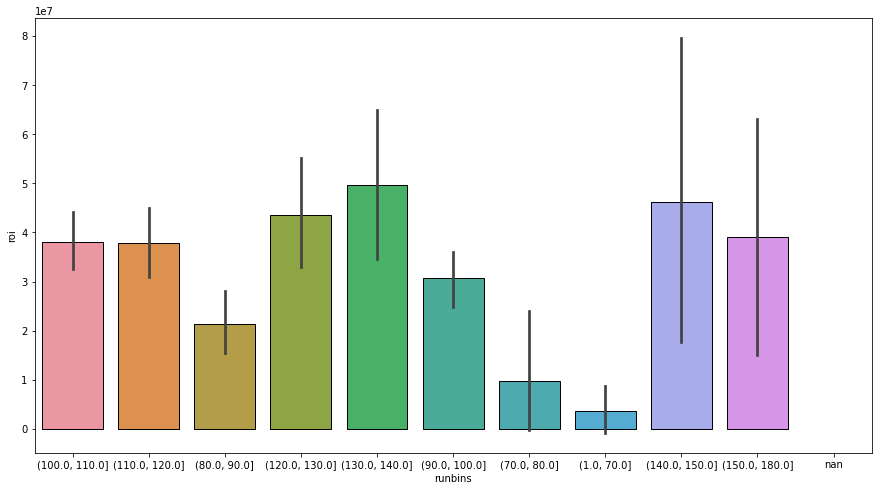

In [44]:
bins = [1, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180]

#df_dropOutliers[['roi','runtime_minutes']].groupby(pd.cut(df_dropOutliers['runtime_minutes'], bins)).head()

#pd.cut(df_dropOutliers['runtime_minutes'], bins)

df_runtime = df_dropOutliers[~df_dropOutliers['runtime_minutes'].isna()]
df_runtime['runbins'] = pd.cut(df_dropOutliers['runtime_minutes'], bins).astype(str)
#df_runtime
plt.figure(figsize = (15,8))
sns.barplot(x='runbins', y='roi', data=df_runtime, alpha=1, edgecolor='k')
#sns.scatterplot(x='runtime_minutes', y='roi', data=df_dropOutliers, alpha=0.2, edgecolor='k')

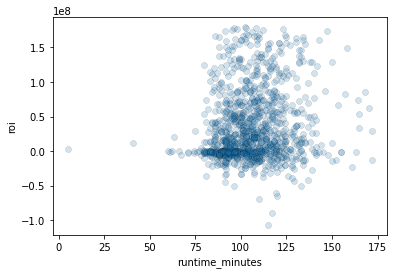

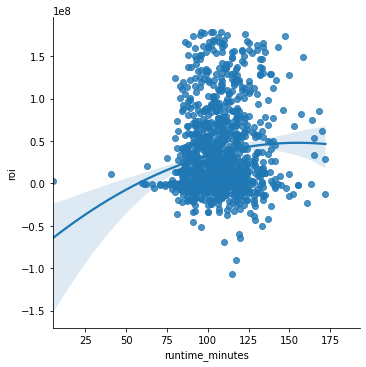

In [45]:

sns.scatterplot(x='runtime_minutes', y='roi', data=df_dropOutliers, alpha=0.2, edgecolor='k')

#sns.(x='runtime_minutes', y='roi', data=df_dropOutliers, alpha=1, edgecolor='k')
sns.lmplot(x='runtime_minutes', y='roi', data=df_dropOutliers, order=2)

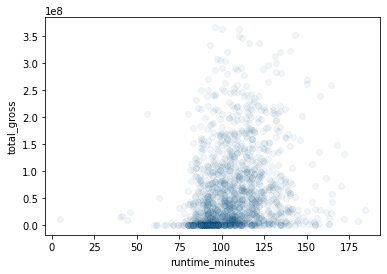

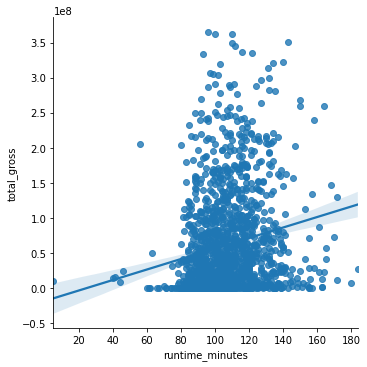

In [46]:
sns.scatterplot(x='runtime_minutes', y='total_gross', data=df_dropOutliers, alpha=0.07, edgecolor='k')
sns.lmplot(x='runtime_minutes', y='total_gross', data=df_dropOutliers)

In [47]:
#create column for release month
def cleanMonth(dateStr):
    
    date = datetime.strptime(dateStr, '%b %d, %Y')
    return str(date.month)

#assign to new frame 
df_month = df_dropOutliers[~df_dropOutliers['release_date'].isna()]
df_month.loc[:, 'release_month'] = df_month['release_date'].map(cleanMonth)

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:xlabel='roi', ylabel='release_month'>

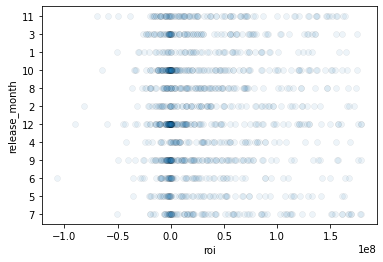

In [48]:
sns.scatterplot(x='roi', y='release_month', data=df_month, alpha=0.08, edgecolor='k')

<AxesSubplot:xlabel='total_gross', ylabel='release_month'>

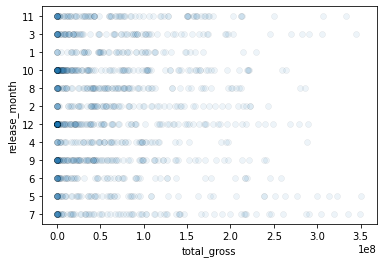

In [49]:
sns.scatterplot(x='total_gross', y='release_month', data=df_month, alpha=0.08, edgecolor='k')

In [50]:
month_avgs = df_month[['roi', 'release_month']].groupby('release_month').mean()
month_avgs.rename(index={'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May',
                         '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}, inplace=True)
month_avgs

,roi
release_month,
Jan,3.887628e+07
Oct,2.930566e+07
Nov,3.861900e+07
Dec,2.431271e+07
Feb,3.947213e+07
Mar,3.346391e+07
Apr,3.729690e+07
May,3.548316e+07
Jun,2.508881e+07


Text(0.5, 1.0, 'release_month vs roi')

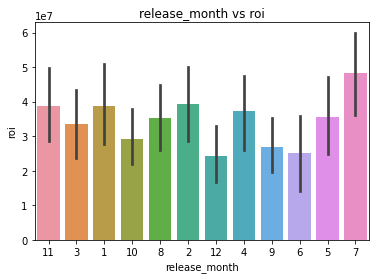

In [51]:
sns.barplot(x='release_month', y='roi', data=df_month).set_title('release_month vs roi')

In [71]:
df_dropOutliers['start_year'].max()

2020